In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# importation du dataset
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis
## Analyse de la forme:
- Indentification de la target : Survived


In [4]:
# Nbres de lignes et de colonnes
df.shape


(891, 12)

In [5]:
# Types de variables
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Preprocessing

In [7]:
# Elimination des NaN
df = df.dropna(axis = 0)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [9]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Feature Selection
data = df.drop(['PassengerId', 'Name', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)

In [11]:
data.head()

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
3,1,1,female,35.0
6,0,1,male,54.0
10,1,3,female,4.0
11,1,1,female,58.0


In [12]:
# Encodage
data['Sex'] = data['Sex'].replace(['female','male'],['0','1'])

In [13]:
data.head()

,Survived,Pclass,Sex,Age
1,1,1,0,38.0
3,1,1,0,35.0
6,0,1,1,54.0
10,1,3,0,4.0
11,1,1,0,58.0


In [14]:
# Repartition de nos données (Target et features)
Y = data['Survived']
X = data.drop('Survived', axis = 1)

# Classification problem - solving

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Entrainement du model
model = KNeighborsClassifier()
model.fit(X,Y)

KNeighborsClassifier()

In [18]:
# Evaluation du score
model.score(X,Y)

0.7978142076502732

In [19]:
# Voir a peu près les passagers qui ont survécu
model.predict(X)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [20]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age'], dtype='object')

In [31]:
# Etablissement d'une fonction pour faire des prédictions dans la vie réelle

def survie(model ,Pclass=3, Sex=1, Age =18):
    # Transformation du input en nparray sans oublier de reshape à la même dimension qu'au X_train
    x = np.array([Pclass,Sex,Age]).reshape(1,3)
    # Affichage de la prédiction
    result = model.predict(x)
    if result == 1 :
        print('Félicitations, vous aurais survie')
    else:
        print('Désolé !!')
    

In [41]:
survie(model, Pclass =1 ,Sex =1 , Age=18)

Félicitations, vous aurais survie


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# REGRESSION PROJECT

In [42]:
# Création de notre dataset (On n'oublie pas de les reshape)
X = np.linspace(0,10,100).reshape(100,1) # 100 features réparti d'une manière égale entre 0 et 10 (X is an array)
np.random.seed(0)
b = np.random.randn(100,1)
Y = X + b

Text(0, 0.5, 'target')

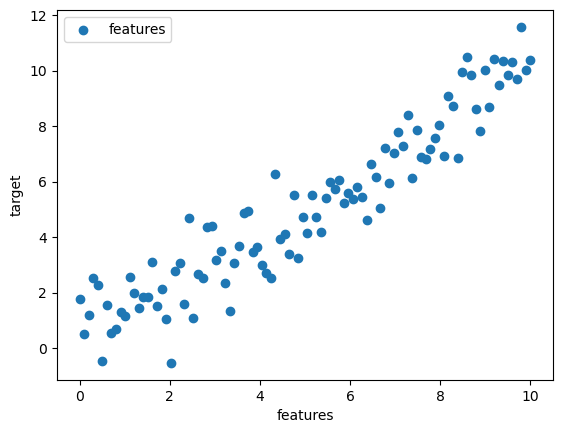

In [45]:
# Visualisation de nos données
plt.scatter(X,Y ,label = 'features')
plt.legend()
plt.xlabel('features')
plt.ylabel('target')

In [46]:
# Importation de notre modèle 
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()
model.fit(X,Y)
model.score(X,Y)

0.8881140743377214

Text(0, 0.5, 'predictions')

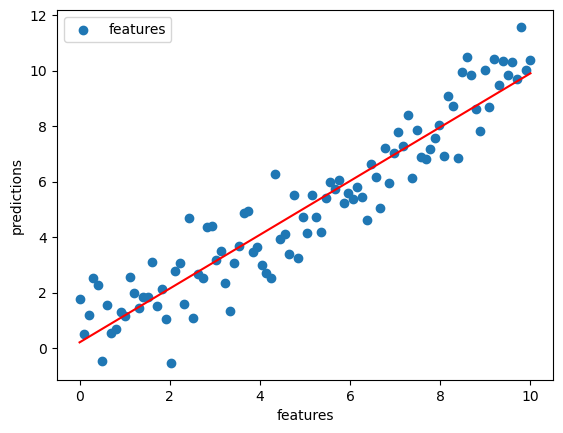

In [53]:
# Visualisation de la prédiction 
predictions = model.predict(X) # predictions correspond à notre ^y chapeau
plt.scatter(X,Y ,label = 'features')
plt.plot(X, predictions, c ='r')
plt.legend()
plt.xlabel('features')
plt.ylabel('predictions')